In [1]:
# import libraries
import pandas as pd
import plotly.express as px

In [2]:
# load dataset
df = pd.read_csv("/Users/bsama/Downloads/beckdel_allinfo_final.csv")
df.head()

,year,rating,imdbid,id,title,imdb_tt,genre,description,imdb_rating,bechdel_pass
0,1874,0,3155794,9602,Passage de Venus,tt3155794,"Documentary, Short, History",Early chronophotography of the 1874 Venus tran...,6.8,No
1,1877,0,14495706,9804,La Rosace Magique,tt14495706,"Animation, Short",Pre-cinematography color animation of Abstract...,5.7,No
2,1878,0,2221420,9603,Sallie Gardner at a Gallop,tt2221420,"Documentary, Short, Sport","The clip shows a jockey, Gilbert Domm, riding ...",7.3,No
3,1878,0,12592084,9806,Le singe musicien,tt12592084,"Animation, Short",Pre-cinematograph colour animation of the monk...,6.0,No
4,1881,0,7816420,9816,Athlete Swinging a Pick,tt7816420,"Documentary, Short","In this brief photographic sequence, Eadweard ...",5.1,No


In [3]:
df1 = df.drop(['imdbid','id','imdb_tt','description','title'],axis='columns')   # dropping unwanted features

In [4]:
df1.head()

,year,rating,genre,imdb_rating,bechdel_pass
0,1874,0,"Documentary, Short, History",6.8,No
1,1877,0,"Animation, Short",5.7,No
2,1878,0,"Documentary, Short, Sport",7.3,No
3,1878,0,"Animation, Short",6.0,No
4,1881,0,"Documentary, Short",5.1,No


In [5]:
df1.isnull().sum()

year              0
rating            0
genre           218
imdb_rating     243
bechdel_pass      0
dtype: int64

In [6]:
df2 = df1.dropna()  # dropping null values

In [7]:
df2.isnull().sum()

year            0
rating          0
genre           0
imdb_rating     0
bechdel_pass    0
dtype: int64

In [8]:
df2.shape

(10416, 5)

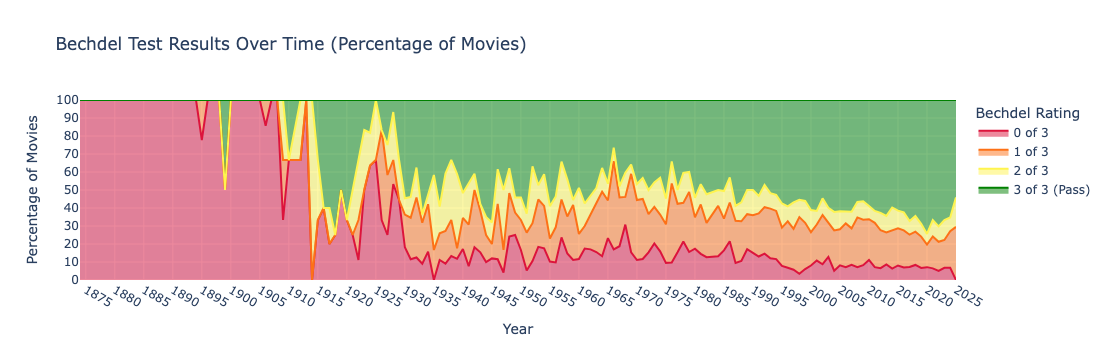

In [9]:
# data prepping
df_area = df2.copy()

# count movies per year per rating
grouped = (
    df_area.groupby(["year", "rating"])
    .size()
    .reset_index(name="count")
)

# convert counts to percentages per year
grouped["percentage"] = grouped.groupby("year")["count"].transform(
    lambda x: 100 * x / x.sum()
)

# label mapping
rating_labels = {
    0: "0 of 3",
    1: "1 of 3",
    2: "2 of 3",
    3: "3 of 3 (Pass)"
}

grouped["label"] = grouped["rating"].map(rating_labels)

# create stacked area plot
fig = px.area(
    grouped.sort_values("label"),
    x="year",
    y="percentage",
    color="label",
    color_discrete_sequence=px.colors.qualitative.Set1,
    title="Bechdel Test Results Over Time (Percentage of Movies)",
    labels={
        "year": "Year",
        "percentage": "Percentage of Movies",
        "label": "Bechdel Rating"
    },
    color_discrete_map={
        "0 of 3": "#DC143C",
        "1 of 3": "#FD7117",
        "2 of 3": "#FFF44F",
        "3 of 3 (Pass)": "#008000",
    }
)

# lock y-axis to 100%
fig.update_layout(
    yaxis=dict(range=[0, 100]),
    hovermode="x unified"
)

fig.update_xaxes(dtick=5)
fig.update_yaxes(dtick=10)

fig.show()

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


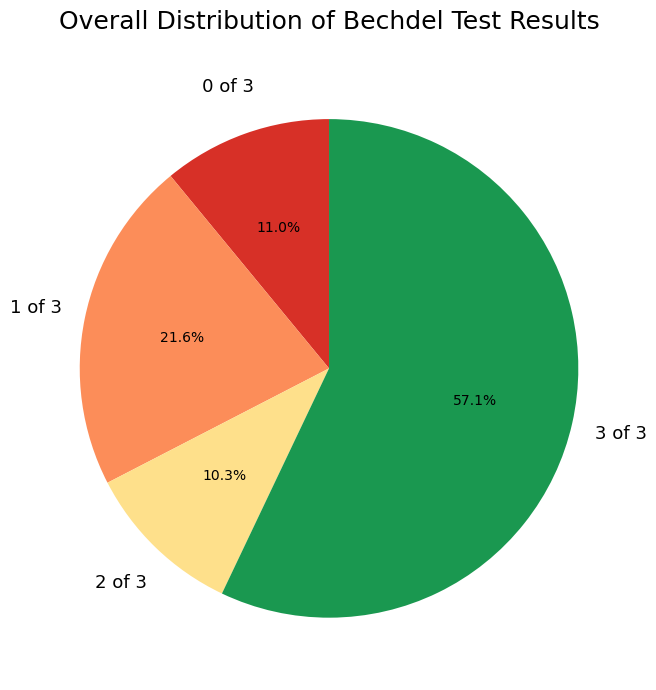

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# prepare Data
df_matplotpie = df2.copy()

# count movies by rating
counts = df_matplotpie["rating"].value_counts().sort_index()

labels = [
    "0 of 3",
    "1 of 3",
    "2 of 3",
    "3 of 3"
]

values = [counts.get(i, 0) for i in range(4)]

# colors (red , orange , yellow , green)
colors = ["#d73027", "#fc8d59", "#fee08b", "#1a9850"]

# plot
fig, ax = plt.subplots(figsize=(7, 7))

wedges, texts, autotexts = ax.pie(
    values,
    colors=colors,
    startangle=90,
    autopct="%1.1f%%",
    pctdistance=0.6,
    textprops=dict(color="black", fontsize=10),
    wedgeprops=dict(linewidth=0)
)

# add labels outside
for i, wedge in enumerate(wedges):
    angle = (wedge.theta1 + wedge.theta2) / 2
    x = np.cos(np.deg2rad(angle))
    y = np.sin(np.deg2rad(angle))

    ax.annotate(
        labels[i],
        xy=(0.9 * x, 0.9 * y),      # point on pie edge
        xytext=(1.2 * x, 1.2 * y),  # label position
        ha="center",
        va="center",
        fontsize=13,
        color="black"
    )

# styling
ax.set_title(
    "Overall Distribution of Bechdel Test Results",
    fontsize=18,
    color="black",
    pad=20
)

ax.set_aspect("equal")
plt.tight_layout()
plt.show()

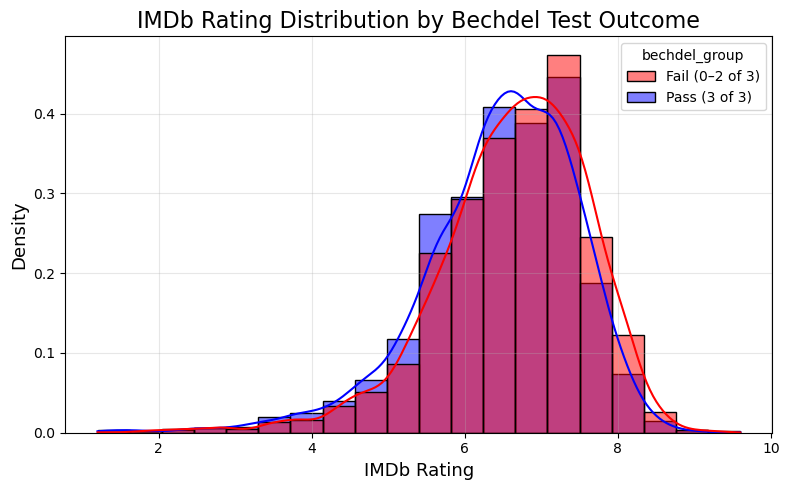

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# prepare data
df_histo = df2.copy()

# clean columns
df_histo["rating"] = pd.to_numeric(df["rating"], errors="coerce")
df_histo["imdb_rating"] = pd.to_numeric(df["imdb_rating"], errors="coerce")

df = df.dropna(subset=["rating", "imdb_rating"])

# define pass/fail groups
df_histo["bechdel_group"] = df_histo["rating"].apply(
    lambda x: "Pass (3 of 3)" if int(round(x)) == 3 else "Fail (0–2 of 3)"
)

# plot
plt.figure(figsize=(8, 5))

sns.histplot(
    data=df_histo,
    x="imdb_rating",
    hue="bechdel_group",
    bins=20,
    stat="density",
    common_norm=False,
    kde=True,
    palette={
        "Pass (3 of 3)": "#0000FF",   # green
        "Fail (0–2 of 3)": "#FF0000" # red
    },
    alpha=0.5
)

# styling
plt.title("IMDb Rating Distribution by Bechdel Test Outcome", fontsize=16)
plt.xlabel("IMDb Rating", fontsize=13)
plt.ylabel("Density", fontsize=13)

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()